In [28]:
import pandas as pd
pd.__version__

'2.3.3'

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

In [30]:
# Storing the data in a pandas data frame.

df = pd.read_csv("data/PewDiePie.csv")
df.head(10)

,Date,Subscribers
0,1,71915
1,2,48270
2,3,47746
3,4,42276
4,5,36867
5,6,28722
6,7,29794
7,8,33125
8,9,27877
9,10,30675


In [31]:
x = df.iloc[:, 0]
x_df = pd.DataFrame(x)
y = df.iloc[:, 1]
print(x_df)
print(y)

    Date
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
0     71915
1     48270
2     47746
3     42276
4     36867
5     28722
6     29794
7     33125
8     27877
9     30675
10    32450
11    45714
12    59377
13    42289
14    36002
15    25872
16    31623
17    46504
18    49421
19    27844
Name: Subscribers, dtype: int64


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size = 0.3)
print(x_test)
print(y_test)
print(x_train)
print(y_train)

    Date
0      1
4      5
9     10
6      7
13    14
5      6
0     71915
4     36867
9     30675
6     29794
13    42289
5     28722
Name: Subscribers, dtype: int64
    Date
11    12
17    18
1      2
15    16
16    17
19    20
2      3
7      8
3      4
10    11
14    15
8      9
12    13
18    19
11    45714
17    46504
1     48270
15    25872
16    31623
19    27844
2     47746
7     33125
3     42276
10    32450
14    36002
8     27877
12    59377
18    49421
Name: Subscribers, dtype: int64


In [33]:
# training a simple linear regression model
simpleLinearRegression = LinearRegression()
simpleLinearRegression.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
# test trained model
y_predict = simpleLinearRegression.predict(x_test)
x_test_series = x_test.iloc[:,0]
predict = pd.DataFrame({'X Test': x_test_series, 'Y Predict': y_predict, 'Y Real': y_test})
predict.head(10)

,X Test,Y Predict,Y Real
0,1,43823.455483,71915
4,5,42269.798574,36867
9,10,40327.727438,30675
6,7,41492.970120,29794
13,14,38774.070529,42289
5,6,41881.384347,28722


In [35]:
# model evaluation
rmse = root_mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# printing values
print('Slope:' ,simpleLinearRegression.coef_)
print('Intercept:', simpleLinearRegression.intercept_)
print('Variance score: {}'.format(simpleLinearRegression.score(x_test, y_test)))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-388.41422721]
Intercept: 44211.8697102988
Variance score: 0.0873068338931624
Root mean squared error:  14340.445601030571
R2 score:  0.0873068338931624


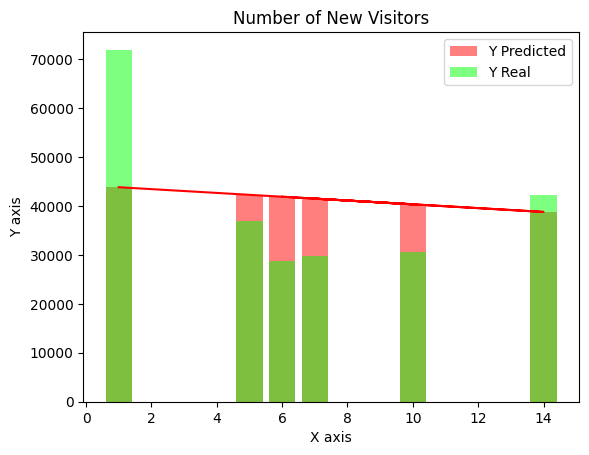

In [36]:
# plotting values

# data points
plt.bar(x_test_series, y_predict, label="Y Predicted", color=[1,0,0, 0.5])
plt.bar(x_test_series, y_test, label="Y Real", color=[0,1,0, 0.5])
plt.plot()

plt.plot(x_test_series, y_predict, color='r')

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Number of New Visitors")
plt.legend()
plt.show()